In [1]:
import numpy as np
import cmdstanpy
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import arviz as az
import pandas as pd

In [2]:
df = pd.read_csv('./mon.csv')
df['subn'] = df['sub'].rank(method='dense').astype(int)

refValue = 5
refProbability = 1
refAmbiguity = 1

seed = 10112015

In [3]:
N = df.shape[0]
choice = df['choice'].astype(int)
refProbabilities = np.repeat(refProbability, N)
refValues=np.repeat(refValue, N)
lotteryProbabilities = df['risk'].astype(float)
ID = df['subn'].astype('int')
lotteryValues = df['value'].astype('int')
n_sub = len(df['sub'].unique())

In [4]:
# define dictionary of data
standata_simple = {
    'N' : N,
    'choice' : choice,
    'refProbabilities' : refProbabilities,
    'refValues' : refValues,
    'lotteryProbabilities' : lotteryProbabilities,
    'ID' : ID,
    'lotteryValues' : lotteryValues,
    'n_sub': n_sub
}

In [5]:
simpleModel = cmdstanpy.CmdStanModel(stan_file='simpleModel.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [6]:
fit_simple_model = simpleModel.sample(
  data = standata_simple,
  chains = 4,
  iter_warmup = 1000,
  iter_sampling = 1000,
  adapt_delta = .9,
  inits = 0.2,
)

INFO:cmdstanpy:CmdStan start procesing
ERROR:cmdstanpy:Error in progress bar initialization:
	IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
Disabling progress bars for this session
Exception ignored in: <function tqdm.__del__ at 0x7fa17057ae50>
Traceback (most recent call last):
  File "/home/nachshon/anaconda3/envs/risk/lib/python3.8/site-packages/tqdm/std.py", line 1147, in __del__
    self.close()
  File "/home/nachshon/anaconda3/envs/risk/lib/python3.8/site-packages/tqdm/notebook.py", line 286, in close
    self.disp(bar_style='danger', check_delay=False)
AttributeError: 'tqdm' object has no attribute 'disp'


INFO:cmdstanpy:CmdStan done processing.


In [7]:
fit_simple_model.draws(concat_chains=True).shape

(4000, 11841)

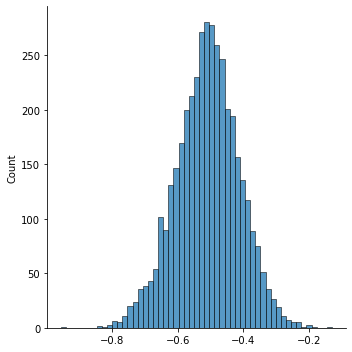

In [8]:
draws_rmu = fit_simple_model.stan_variable(var='rMu')
sns.displot(draws_rmu)

In [9]:
cmdstanpy_data = az.from_cmdstanpy(posterior=fit_simple_model)

In [10]:
az.summary(cmdstanpy_data, var_names=['riskTol'])

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
riskTol[0],0.742,0.058,0.632,0.849,0.001,0.001,6534.0,3270.0,1.0
riskTol[1],0.141,0.029,0.080,0.191,0.000,0.000,4067.0,2291.0,1.0
riskTol[2],0.983,0.291,0.368,1.508,0.007,0.005,1649.0,1667.0,1.0
riskTol[3],0.794,0.110,0.606,1.012,0.002,0.001,3691.0,2580.0,1.0
riskTol[4],0.273,0.044,0.188,0.351,0.001,0.000,5031.0,2370.0,1.0
riskTol[5],0.338,0.142,0.105,0.612,0.002,0.002,4251.0,3076.0,1.0
riskTol[6],0.474,0.044,0.388,0.556,0.001,0.000,5694.0,2526.0,1.0
riskTol[7],0.713,0.059,0.607,0.826,0.001,0.001,6063.0,3427.0,1.0
riskTol[8],0.547,0.040,0.473,0.622,0.001,0.000,6044.0,3230.0,1.0
riskTol[9],0.839,0.042,0.763,0.924,0.001,0.000,3856.0,2380.0,1.0


In [11]:
AmbiguityModel = cmdstanpy.CmdStanModel(stan_file='AmbiguityModel.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [12]:
refAmbiguities = np.repeat(refAmbiguity, N)
lotteryAmbiguities = df['ambiguity'].astype(float)

In [13]:
# define dictionary of data
standata_ambiguity = {
    'N' : N,
    'choice' : choice,
    'refProbabilities' : refProbabilities,
    'refAmbiguities' : refAmbiguities,
    'refValues' : refValues,
    'lotteryProbabilities' : lotteryProbabilities,
    'lotteryAmbiguities' : lotteryAmbiguities,
    'ID' : ID,
    'lotteryValues' : lotteryValues,
    'n_sub': n_sub
}

In [14]:
fit_ambiguity_model = AmbiguityModel.sample(
  data = standata_ambiguity,
  chains = 4,
  iter_warmup = 1000,
  iter_sampling = 1000,
  adapt_delta = .9,
  inits = 0.2,
)

INFO:cmdstanpy:CmdStan start procesing
INFO:cmdstanpy:Chain [1] start processing
INFO:cmdstanpy:Chain [2] start processing
INFO:cmdstanpy:Chain [3] start processing
INFO:cmdstanpy:Chain [4] start processing
INFO:cmdstanpy:Chain [3] done processing
INFO:cmdstanpy:Chain [2] done processing
INFO:cmdstanpy:Chain [4] done processing
INFO:cmdstanpy:Chain [1] done processing


In [15]:
cmdstanpy_data_amb = az.from_cmdstanpy(posterior=fit_ambiguity_model)

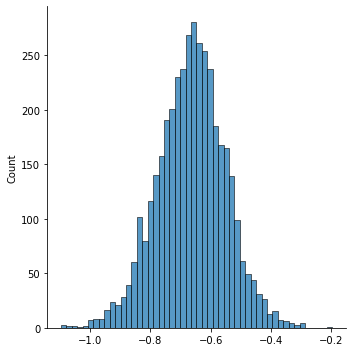

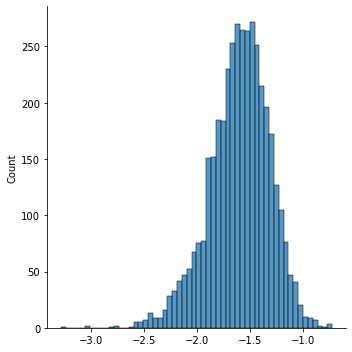

In [16]:
draws_rmu = fit_ambiguity_model.stan_variable(var='aMu')
draws_bmu = fit_ambiguity_model.stan_variable(var='bMu')
sns.displot(draws_rmu)
sns.displot(draws_bmu)

In [17]:
az.summary(cmdstanpy_data_amb, var_names=['riskTol'])

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
riskTol[0],0.710,0.060,0.593,0.817,0.001,0.001,4725.0,2856.0,1.0
riskTol[1],0.114,0.031,0.053,0.169,0.001,0.000,3192.0,2048.0,1.0
riskTol[2],0.287,0.189,0.036,0.595,0.008,0.007,1318.0,435.0,1.0
riskTol[3],0.657,0.109,0.446,0.859,0.002,0.001,3387.0,2610.0,1.0
riskTol[4],0.240,0.051,0.139,0.328,0.001,0.001,4077.0,2078.0,1.0
riskTol[5],0.249,0.115,0.054,0.450,0.002,0.001,3362.0,2398.0,1.0
riskTol[6],0.455,0.047,0.370,0.545,0.001,0.001,4163.0,2310.0,1.0
riskTol[7],0.650,0.055,0.548,0.756,0.001,0.001,4669.0,3041.0,1.0
riskTol[8],0.508,0.038,0.441,0.583,0.001,0.000,4319.0,2929.0,1.0
riskTol[9],0.745,0.036,0.674,0.812,0.001,0.000,3770.0,2966.0,1.0


In [18]:
az.summary(cmdstanpy_data_amb, var_names=['ambTol'])

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
ambTol[0],0.136,0.088,0.003,0.291,0.001,0.001,3177.0,2520.0,1.0
ambTol[1],0.066,0.050,0.001,0.157,0.001,0.001,2875.0,2395.0,1.0
ambTol[2],3.757,2.173,0.021,7.159,0.057,0.041,914.0,319.0,1.0
ambTol[3],0.655,0.228,0.171,1.058,0.005,0.004,1866.0,1176.0,1.0
ambTol[4],0.084,0.063,0.001,0.200,0.001,0.001,3357.0,2534.0,1.0
ambTol[5],0.253,0.283,0.000,0.713,0.004,0.004,5310.0,2478.0,1.0
ambTol[6],0.098,0.070,0.001,0.228,0.001,0.001,3201.0,2509.0,1.0
ambTol[7],0.374,0.128,0.106,0.591,0.003,0.002,2507.0,1404.0,1.0
ambTol[8],0.269,0.101,0.079,0.456,0.002,0.001,2636.0,1259.0,1.0
ambTol[9],0.376,0.084,0.214,0.533,0.001,0.001,4067.0,2339.0,1.0
